<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_6913/NGC_6913_version_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [1]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestClassifier

In [2]:
!pip install astroquery

     |████████████████████████████████| 6.5MB 5.1MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 2.6MB 47.1MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=6c0da03356e71aa8b9a2afd869b1b16e90fbe2f7465f7016c67350ba1025617f
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery


In [3]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [6]:
## making a GAIA cone_search of 30m radius around NGC6913 center

coordinate = coord.SkyCoord.from_name('NGC6913')
print(coordinate)
radius = u.Quantity(0.8, u.deg)
# GAIA EDR3 data
# j = Gaia.cone_search_async(coordinate, radius, table_name="gaiaedr3.gaia_source")

# GAIA DR2 Data
j = Gaia.cone_search_async(coordinate, radius, table_name="gaiadr2.gaia_source")
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (305.9833, 38.5233)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [7]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,Gaia DR2 2061130135063018368,2061130135063018368,659634151,2015.5,305.979910,0.332861,38.522535,0.301018,0.373794,0.412532,0.906096,-5.100601,0.812966,-8.181460,0.579568,-0.017581,0.084075,0.098068,0.034593,0.372245,0.010567,-0.133693,-0.021647,0.017277,0.016911,242,0,241,1,2.371331,290.591705,0.973766,1.042753,31,False,0.092856,1.314335,0.090345,-0.025863,...,374.200125,6.729877,55.602821,18.329161,1.700114,0,2.624422,1.276796,1.347626,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.913312,0.606578,324.067662,55.412832,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002767
1,1635721458409799680,Gaia DR2 2061130169422135168,2061130169422135168,1047410342,2015.5,305.986649,0.551148,38.524911,0.562689,-0.757284,0.713565,-1.061268,-4.351111,1.294378,-4.469651,1.147469,-0.314511,-0.306406,-0.143730,0.110184,0.285002,0.082362,-0.386891,0.024789,0.077053,-0.019642,214,0,213,1,2.072794,252.446564,0.397076,0.062603,31,False,0.039263,1.379358,0.144610,0.042972,...,195.589708,10.444030,18.727419,19.033554,1.842011,0,2.083460,0.738298,1.345161,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.918285,0.603627,324.077848,55.412826,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.003068
2,1635721458409799680,Gaia DR2 2061130135061358080,2061130135061358080,1539788148,2015.5,305.977852,0.159351,38.523700,0.167229,0.232010,0.214437,1.081950,-3.257656,0.385975,-5.809052,0.344036,-0.101113,-0.028410,-0.068365,0.028975,0.305656,0.019233,-0.077661,-0.029386,0.035019,0.039842,263,0,262,1,1.800683,299.285553,0.564693,1.225498,31,False,0.305587,1.323049,0.046636,0.036019,...,712.860518,10.730518,66.433006,17.629408,1.514112,0,2.449070,1.252272,1.196798,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.913341,0.608565,324.065922,55.414556,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.004286
3,1635721458409799680,Gaia DR2 2061130173719911552,2061130173719911552,1630697475,2015.5,305.987777,1.436923,38.525853,1.461241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.015759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88,0,88,0,-1.281829,66.976456,0.000000,0.000000,3,False,0.013401,NaN,NaN,0.052217,...,110.490162,15.678766,7.047121,19.653610,2.215422,0,1.295437,-0.038664,1.334101,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.919563,0.603446,324.079948,55.413321,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.004326
4,1635721458409799680,Gaia DR2 2061130135063855360,2061130135063855360,1083281779,2015.5,305.977760,0.245453,38.52

##### Applying Filter:

In [292]:
all_stars['pmra_over_error'] = abs(all_stars['pmra']/all_stars['pmra_error'])
all_stars['pmdec_over_error'] = abs(all_stars['pmdec']/all_stars['pmdec_error'])

In [293]:
all_stars_filtered = all_stars[all_stars['parallax_over_error'] > 3]

In [294]:
all_stars_filtered = all_stars_filtered[(all_stars_filtered.pmra_error < 0.3) & (all_stars_filtered.pmdec_error < 0.3)]

In [295]:
all_stars_filtered.shape

(23988, 99)

##### Visualizing GAIA data

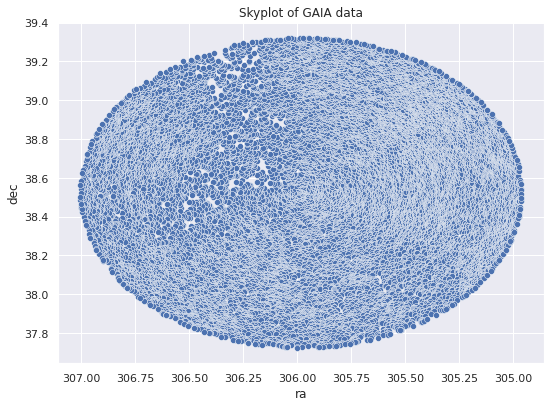

In [296]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x='ra', y='dec', 
                          data = all_stars_filtered)
skyplot.invert_xaxis()
plt.title('Skyplot of GAIA data')
plt.show()

#### Finding Cantat Data

In [297]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [298]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
#catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
#catalogs

In [299]:
## saving only NGC 6913 data from Cantat GAIA DR2 paper

cantat_6913 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_6913")
cantat_6913 = cantat_6913[0].to_pandas()
cantat_6913

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,305.969238,38.303085,2061114643120061952,0.5934,-3.488,-5.897,NaN,15.447200,1.6735,0.8,NGC_6913,305.969258,38.303110
1,305.871156,38.486870,2061130551679058432,0.5344,-3.476,-5.747,NaN,14.504200,1.0105,0.8,NGC_6913,305.871175,38.486895
2,305.916894,38.295450,2061115021077207296,0.5359,-3.500,-5.608,NaN,15.938500,1.7948,0.4,NGC_6913,305.916914,38.295474
3,305.943575,38.655508,2061158176909306496,0.5496,-3.072,-5.630,NaN,13.786300,1.3860,0.7,NGC_6913,305.943591,38.655532
4,305.729983,38.379210,2061125363358595200,0.5688,-3.459,-5.879,NaN,14.523400,1.3140,1.0,NGC_6913,305.730002,38.379235
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,305.693412,38.581854,2061180579450262656,0.5195,-3.086,-6.098,NaN,16.030199,1.6694,0.1,NGC_6913,305.693429,38.581881
166,305.710603,38.650615,2061181571589836544,0.5638,-3.211,-5.658,NaN,17.743799,1.9652,0.5,NGC_6913,305.710621,38.650640
167,305.830998,38.732448,2061206413680783488,0.4924,-3.305,-5.605,NaN,17.912500,2.3891,0.2,NGC_6913,305.831016,38.732472
168,306.214730,38.283003,2058109815277535616,0.5582,-3.076,-5.901,NaN,16.621000,2.3549,0.1,NGC_6913,306.214747,38.283028


In [300]:
# renaming the cantat table to match it with gaia_data
cantat_6913 = cantat_6913.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [301]:
# taking the subset of only source_id and PMemb
cantat_6913 = cantat_6913.loc[:,['source_id', 'PMemb']]


In [302]:
# join the two table on source_id
cantat_6913 = all_stars_filtered.join(cantat_6913.set_index('source_id'), on='source_id')

In [303]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_6913 = cantat_6913.dropna(subset=['PMemb'])
cantat_6913

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb
29,1635721458409799680,Gaia DR2 2061130139362333824,2061130139362333824,954418691,2015.5,305.990473,0.013010,38.514351,0.014309,0.542993,0.017657,30.752131,-3.402550,0.029173,-5.793631,0.029298,-0.121473,0.013768,-0.120340,-0.001874,0.249431,-0.026708,-0.117860,-0.100446,-0.117522,-0.106875,275,0,275,0,-4.420243,179.250107,0.000000,0.000000,31,False,68.874550,1.517808,0.003702,0.051634,...,13.131310,1.262399,1,1.257004,0.546887,0.710116,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.911361,0.595112,324.074993,55.401971,100002,4813.937012,4715.242676,4982.020020,NaN,NaN,NaN,NaN,NaN,NaN,200111,4.187072,3.909311,4.364184,8.482368,7.701898,9.262839,https://gea.esac.esa.int/data-server/datalink/...,,0.010565,116.632893,197.746675,0.9
39,1635721458409799680,Gaia DR2 2061130173722072320,2061130173722072320,1141266204,2015.5,305.998644,0.033662,38.527390,0.022625,0.507027,0.034273,14.793980,-3.190718,0.081669,-5.637011,0.045854,-0.146535,-0.394684,0.417441,0.130678,0.264738,-0.031606,-0.128072,-0.211356,-0.191511,0.091486,197,0,196,1,-1.613617,160.571564,0.000000,0.000000,31,False,21.751890,1.494739,0.007018,0.083249,...,14.249866,1.320299,0,1.387800,0.584863,0.802938,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.925706,0.597371,324.094710,55.411221,100001,4492.000000,4425.500000,4906.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,3.112038,2.608971,3.206267,3.552577,2.987486,4.117669,https://gea.esac.esa.int/data-server/datalink/...,,0.012674,39.068763,122.933351,0.7
58,1635721458409799680,Gaia DR2 2061130070642666880,2061130070642666880,1477295721,2015.5,305.989576,0.021783,38.509626,0.021940,0.537889,0.028150,19.107899,-3.441772,0.044039,-5.877576,0.043456,-0.133816,0.108276,-0.140303,-0.061589,0.237611,-0.103821,-0.083638,-0.247389,-0.068452,-0.057484,248,248,247,1,0.012927,241.617935,0.000000,0.000000,31,True,240.833008,1.551702,0.006401,0.109116,...,11.969657,1.245247,0,1.129319,0.480597,0.648722,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.907090,0.592971,324.070442,55.397954,100001,4938.652344,4866.310059,5085.106934,NaN,NaN,NaN,NaN,NaN,NaN,200111,6.942542,6.548400,7.150491,25.832445,23.617132,28.047758,https://gea.esac.esa.int/data-server/datalink/...,,0.014532,78.151991,135.253726,1.0
82,1635721458409799680,Gaia DR2 2061130100701594752,2061130100701594752,1037082205,2015.5,305.998585,0.070253,38.510091,0.079943,0.526576,0.095286,5.526245,-3.564348,0.164491,-5.650762,0.176258,-0.126325,0.011177,-0.093192,0.009505,0.082709,-0.016679,-0.284162,-0.148596,0.030191,-0.072290,247,0,247,0,2.805028,308.320526,0.354874,2.568195,31,False,1.535858,1.357920,0.020578,0.124196,...,16.305899,1.429119,0,2.239937,1.140545,1.099392,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.911521,0.587468,324.082092,55.395476,<NA>,NaN,NaN,NaN,NaN,NaN,N

In [304]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_6913.to_csv('NGC_6913_cantat.csv')
# all_stars.to_csv('NGC_6913_Gaia_30m.csv')

In [305]:
cantat_6913.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb
count,1.700000e+02,1.700000e+02,1.700000e+02,170.0,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.0,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,1.690000e+02,169.000000,169.000000,169.000000,169.000000,170.000000,169.000000,169.000000,169.000000,1.000000,1.000000,170.000000,1.0,1.0,1.0,170.000000,170.000000,170.000000,170.000000,145.000000,145.000000,145.000000,145.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,144.0,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,170.000000,170.000000,170.000000,170.000000
mean,1.635721e+18,2.061104e+18,8.991247e+08,2015.5,305.916874,0.030140,38.498505,0.036322,0.549987,0.041139,18.595560,-3.380745,0.067076,-5.764726,0.074174,-0.052862,0.047154,-0.138174,-0.051963,0.178949,-0.087508,-0.279096,-0.162469,-0.028793,-0.032876,261.029412,31.388235,259.623529,1.405882,-0.452034,251.052277,0.048083,0.398448,31.0,57.397316,1.461027,0.009230,0.062775,29.729412,16.105882,...,7.444622e+04,113.394450,690.067383,14.236567,1.320751,0.176471,1.606532,0.757240,0.849291,-17.989237,5.377616,0.035294,5000.0,3.0,0.0,76.865400,0.633193,323.971153,55.411141,100001.193103,4521.335938,4340.726562,4858.288574,2.151746,1.871649,2.629261,1.076579,0.928603,1.343582,200111.0,4.154220,3.680255,4.482897,15.790257,14.470527,17.109993,0.155453,71.419562,110.971035,0.561765
std,0.000000e+00,3.270528e+14,4.883002e+08,0.0,0.142852,0.021423,0.125399,0.026414,0.031147,0.028844,8.643813,0.162431,0.048570,0.184031,0.055731,0.074475,0.128318,0.103372,0.062765,0.135922,0.061610,0.135682,0.085144,0.094080,0.076245,22.651574,86.893881,22.167718,2.222790,3.340387,79.192787,0.099826,1.263057,0.0,97.824677,0.079588,0.006703,0.040093,2.543762,0.979355,...,3.264491e+05,603.299153,393.197235,1.571638,0.072689,0.397521,0.452540,0.271826,0.183238,NaN,NaN,0.460179,NaN,NaN,NaN,0.113765,0.123647,0.190410,0.128638,0.396102,556.623779,550.933777,521.955872,0.770660,0.725869,0.540000,0.391130,0.365506,0.281625,0.0,3.504805,3.357561,3.662597,61.949299,57.375221,66.523674,0.085152,33.970233,51.393213,0.257680
min,1.635721e+18,2.058110e+18,1.723005e+06,2015.5,305.636921,0.011508,38.261299,0.013074,0.479977,0.015596,3.813220,-3.740193,0.025444,-6.255921,0.027417,-0.256366,-0.394684,-0.369383,-0.213974,-0.214332,-0.228630,-0.749702,-0.336544,-0.197922,-0.274328,197.000000,0.000000,196.000000,0.000000,-8.638947,106.939201,0.000000,0.000000,31.0

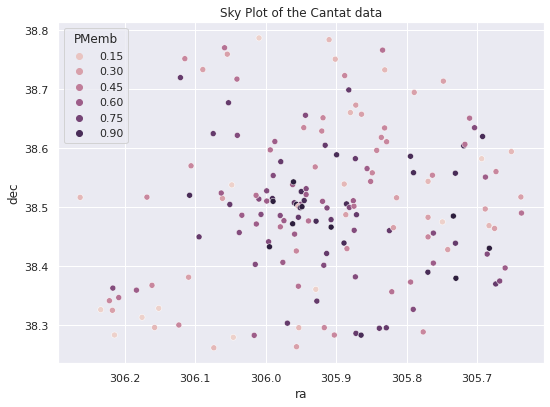

In [306]:
## plotting the skyplot 

skyplot = sns.scatterplot(x = cantat_6913['ra'], y = cantat_6913['dec'], 
                          hue = cantat_6913['PMemb'])
skyplot.invert_xaxis()
plt.title('Sky Plot of the Cantat data')
plt.show()

### Creating, Examining and Processing the Training Data


#### Training Data

In [307]:
# import member dataset
member = cantat_6913.copy()

In [308]:
### adding their distance from the center of the clusters

## NGC 6913
center = coord.SkyCoord.from_name('NGC6913')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((member['ra'] - center_ra)*np.cos(np.radians(member['dec'])))**2 + (member['dec'] - center_dec)**2 )
member['dist_6913_center'] = distance

In [309]:
# maximum distance of stars in Cantat Data
cantat_radius = max(member.dist_6913_center)

In [310]:
member['member'] = np.full(len(member), 1)
member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb,dist_6913_center,member
29,1635721458409799680,Gaia DR2 2061130139362333824,2061130139362333824,954418691,2015.5,305.990473,0.013010,38.514351,0.014309,0.542993,0.017657,30.752131,-3.402550,0.029173,-5.793631,0.029298,-0.121473,0.013768,-0.120340,-0.001874,0.249431,-0.026708,-0.117860,-0.100446,-0.117522,-0.106875,275,0,275,0,-4.420243,179.250107,0.000000,0.000000,31,False,68.874550,1.517808,0.003702,0.051634,...,1,1.257004,0.546887,0.710116,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.911361,0.595112,324.074993,55.401971,100002,4813.937012,4715.242676,4982.020020,NaN,NaN,NaN,NaN,NaN,NaN,200111,4.187072,3.909311,4.364184,8.482368,7.701898,9.262839,https://gea.esac.esa.int/data-server/datalink/...,,0.010565,116.632893,197.746675,0.9,0.010563,1
39,1635721458409799680,Gaia DR2 2061130173722072320,2061130173722072320,1141266204,2015.5,305.998644,0.033662,38.527390,0.022625,0.507027,0.034273,14.793980,-3.190718,0.081669,-5.637011,0.045854,-0.146535,-0.394684,0.417441,0.130678,0.264738,-0.031606,-0.128072,-0.211356,-0.191511,0.091486,197,0,196,1,-1.613617,160.571564,0.000000,0.000000,31,False,21.751890,1.494739,0.007018,0.083249,...,0,1.387800,0.584863,0.802938,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.925706,0.597371,324.094710,55.411221,100001,4492.000000,4425.500000,4906.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,3.112038,2.608971,3.206267,3.552577,2.987486,4.117669,https://gea.esac.esa.int/data-server/datalink/...,,0.012674,39.068763,122.933351,0.7,0.012681,1
58,1635721458409799680,Gaia DR2 2061130070642666880,2061130070642666880,1477295721,2015.5,305.989576,0.021783,38.509626,0.021940,0.537889,0.028150,19.107899,-3.441772,0.044039,-5.877576,0.043456,-0.133816,0.108276,-0.140303,-0.061589,0.237611,-0.103821,-0.083638,-0.247389,-0.068452,-0.057484,248,248,247,1,0.012927,241.617935,0.000000,0.000000,31,True,240.833008,1.551702,0.006401,0.109116,...,0,1.129319,0.480597,0.648722,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.907090,0.592971,324.070442,55.397954,100001,4938.652344,4866.310059,5085.106934,NaN,NaN,NaN,NaN,NaN,NaN,200111,6.942542,6.548400,7.150491,25.832445,23.617132,28.047758,https://gea.esac.esa.int/data-server/datalink/...,,0.014532,78.151991,135.253726,1.0,0.014529,1
82,1635721458409799680,Gaia DR2 2061130100701594752,2061130100701594752,1037082205,2015.5,305.998585,0.070253,38.510091,0.079943,0.526576,0.095286,5.526245,-3.564348,0.164491,-5.650762,0.176258,-0.126325,0.011177,-0.093192,0.009505,0.082709,-0.016679,-0.284162,-0.148596,0.030191,-0.072290,247,0,247,0,2.805028,308.320526,0.354874,2.568195,31,False,1.535858,1.357920,0.020578,0.124196,...,0,2.239937,1.140545,1.099392,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.911521,0.587468,324.082092,55.395476,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.

In [311]:
### adding their distance from the center of the clusters

## NGC 6913
center = coord.SkyCoord.from_name('NGC6913')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((all_stars_filtered['ra'] - center_ra)*np.cos(np.radians(all_stars_filtered['dec'])))**2 + (all_stars_filtered['dec'] - center_dec)**2 )
all_stars_filtered['dist_6913_center'] = distance

In [312]:
non_member = all_stars_filtered[all_stars_filtered['dist_6913_center'] >= 0.7].sample(len(member), random_state = 42)

In [313]:
non_member['member'] = np.full(len(non_member), 0)
non_member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,dist_6913_center,member
129946,1635721458409799680,Gaia DR2 2061086674297357440,2061086674297357440,261750398,2015.5,305.028294,0.037567,38.326500,0.051396,1.173373,0.050528,23.222317,6.747181,0.086128,2.445379,0.103604,-0.011324,0.099102,-0.082582,-0.083532,0.060476,-0.066002,-0.339417,-0.040991,-0.074617,-0.115325,237,0,234,3,-0.854594,210.562439,0.000000,0.000000,31,False,4.826004,1.495512,0.012166,-0.049472,...,1.297112,0,1.583181,0.739937,0.843245,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.327075,1.107209,322.725486,55.537695,100001,4340.500000,4117.433594,4782.633301,0.8190,0.5022,1.1201,0.4030,0.2523,0.5491,200111,0.744119,0.612898,0.826930,0.177067,0.160338,0.193797,https://gea.esac.esa.int/data-server/datalink/...,,0.773627,78.338984,23.603193,0.774609,0
111527,1635721458409799680,Gaia DR2 2058082568004808064,2058082568004808064,476697453,2015.5,306.180695,0.027865,37.820344,0.033762,0.428321,0.037946,11.287707,-3.218334,0.063944,-3.708783,0.072453,-0.025804,0.058445,-0.049652,-0.055292,0.069620,-0.093779,-0.276500,-0.164889,0.126888,0.011992,262,0,260,2,14.346161,734.209534,0.300227,17.593204,31,False,8.502907,1.289570,0.008814,0.095056,...,1.480330,0,2.757081,1.543011,1.214070,20.477552,2.493829,9,4500.0,3.0,0.0,NOT_AVAILABLE,76.429791,0.073468,323.817626,54.707506,100001,4065.550049,3682.120117,4135.004883,2.7025,2.6679,2.7847,1.3547,1.3369,1.4069,200111,6.574073,6.355082,8.014516,10.637536,8.466263,12.808809,https://gea.esac.esa.int/data-server/datalink/...,,0.719886,50.330744,51.188949,0.720043,0
119951,1635721458409799680,Gaia DR2 2061016369966412288,2061016369966412288,1143237621,2015.5,305.368297,0.075967,37.956163,0.098022,2.954430,0.099782,29.608854,14.793312,0.178999,9.880751,0.189574,-0.159427,-0.165925,-0.244963,0.062859,0.174448,0.051363,-0.457430,0.043247,-0.137737,-0.228061,236,0,235,1,3.279732,306.948395,0.257199,1.084615,31,False,1.393978,1.330195,0.025121,-0.020063,...,1.433693,0,2.585100,1.427841,1.157259,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.173942,0.676846,322.893358,55.091007,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.744969,82.644497,52.120729,0.746184,0
115063,1635721458409799680,Gaia DR2 2061069116470862592,2061069116470862592,1135675440,2015.5,305.196549,0.056921,38.132439,0.077229,0.352356,0.085958,4.099180,-3.683326,0.135922,-3.902503,0.168240,-0.012906,-0.007061,-0.004381,-0.018791,0.257277,-0.052503,-0.149623,-0.081102,0.087774,0.058082,238,0,237,1,3.112002,304.897644,0.295030,2.274413,31,False,2.072082,1.308719,0.018658,0.174678,...,1.469326,0,2.458359,1.292746,1.165613,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,76.242109,0.888322,322.800758,55.306819,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,Na

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


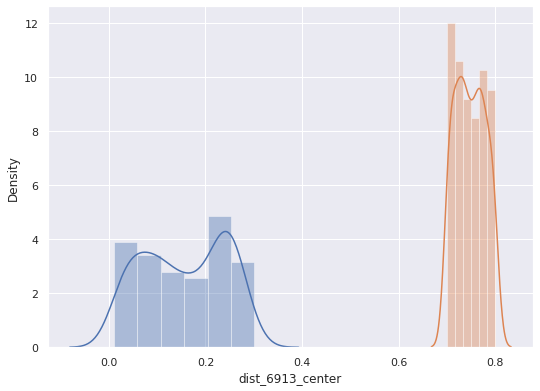

In [314]:
sns.distplot(member['dist_6913_center'])
sns.distplot(non_member['dist_6913_center'])
plt.show()

In [315]:
training_data = pd.concat([member, non_member])

In [316]:
# Examining the descriptive statistics of each column
training_data.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_6913_center,member
count,3.400000e+02,3.400000e+02,3.400000e+02,340.0,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.0,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,...,338.000000,338.000000,338.000000,340.000000,338.000000,338.000000,338.000000,8.000000,8.000000,340.000000,8.000000,8.000000,8.0,340.000000,340.000000,340.000000,340.000000,235.000000,235.000000,235.000000,235.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,211.0,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,340.000000,340.000000,340.000000,170.000000,340.000000,340.000000
mean,1.635721e+18,2.061261e+18,8.549504e+08,2015.5,305.891439,0.042571,38.507749,0.052800,0.655571,0.058276,17.454359,-2.753470,0.095984,-5.372603,0.104811,-0.043801,0.034484,-0.137894,-0.055121,0.184584,-0.093491,-0.293663,-0.152938,-0.022064,-0.027592,257.014706,18.000000,255.770588,1.244118,0.696531,277.435120,0.093909,1.176893,31.0,36.350719,1.428861,0.013108,0.055242,29.308824,16.047059,...,543.176025,14.911744,1.362370,0.152941,1.816529,0.885449,0.931079,-21.580569,2.831636,0.164706,5125.000000,3.250000,0.0,76.862477,0.655260,323.945971,55.426923,100009.714894,4407.329590,4224.472656,4743.463867,1.922699,1.691221,2.262583,0.962521,0.839089,1.144260,200111.0,3.802887,3.338341,4.116961,12.120556,11.038210,13.202908,0.451882,56.423701,89.569836,0.561765,0.451894,0.500000
std,0.000000e+00,1.819316e+15,4.955969e+08,0.0,0.513527,0.028668,0.360772,0.036432,0.709198,0.039196,21.056150,2.875212,0.066040,5.333102,0.071465,0.084918,0.128693,0.105113,0.065721,0.131458,0.070222,0.136848,0.086349,0.101408,0.087236,22.650150,66.741124,22.368337,1.726710,3.990892,127.544365,0.155035,4.057916,0.0,78.256569,0.086650,0.008958,0.045729,2.514016,0.991479,...,399.515381,1.616532,0.111197,0.368554,0.547105,0.350182,0.206161,24.369515,1.980371,1.114104,443.202637,0.534522,0.0,0.358840,0.403594,0.675285,0.380524,130.452858,567.999695,578.719360,530.912170,0.929183,0.913946,0.886606,0.467501,0.459316,0.456019,0.0,3.340977,3.096153,3.539342,51.537270,47.724545,55.352596,0.303648,45.854085,84.774941,0.257680,0.303651,0.500737
min,1.635721e+18,2.058000e+18,1.723005e+06,2015.5,304.961939,0.011508,37.757088,0.013074,0.211180,0.015596,3.047373,-24.626297,0.025444,-70.980742,0.025745,-0.347257,-0.394684,-0.395663,-0.213974,-0.214332,-0.244093,-0.749702,-0.355558,-0.340201,-0.274328,167.000000,0.000000,167.000000,0.000000,-8.638947,106.939201,0.00000

In [317]:
# Choosing the features

feature_columns = ['parallax',
                   'pmra', 'pmdec']

features = training_data.loc[:,feature_columns]
targets = training_data['member']

In [318]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,parallax,pmra,pmdec
count,340.000000,340.000000,340.000000
mean,0.655571,-2.753470,-5.372602
std,0.709198,2.875212,5.333101
min,0.211180,-24.626297,-70.980743
25%,0.510676,-3.515305,-5.908828
50%,0.553216,-3.316676,-5.693716
75%,0.595659,-2.534993,-4.890727
max,12.085427,14.793312,21.395666


In [319]:
targets.value_counts()

1    170
0    170
Name: member, dtype: int64

#### Visualizing Training Data


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


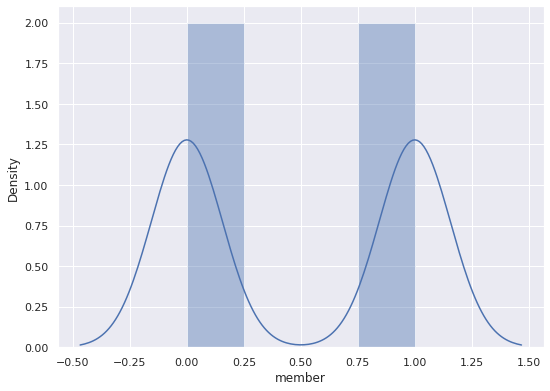

In [320]:
# histogram of PMemb in the training data
sns.distplot(training_set['member'])
plt.show()

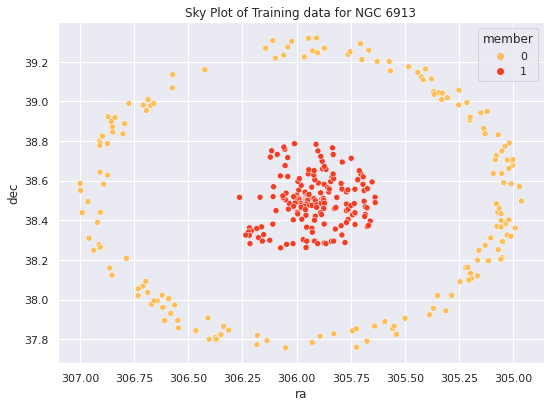

In [321]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', palette='YlOrRd', hue = 'member', data = training_data)
skyplot.invert_xaxis()
plt.title('Sky Plot of Training data for NGC 6913')
plt.show()

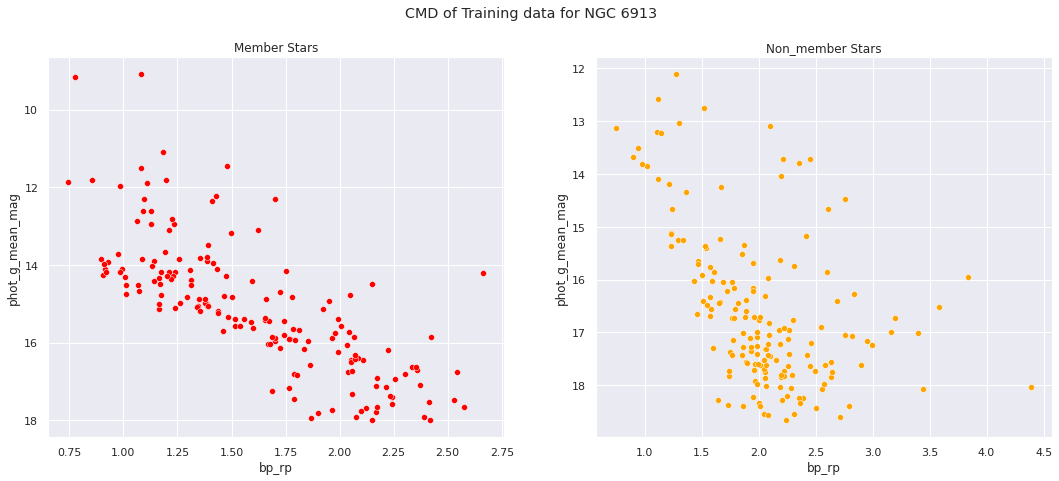

In [322]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
#cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', hue = 'PMemb', data = training_data)
#cmd.invert_yaxis()
#plt.title('')
#plt.show()

# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(18,7))
fig.suptitle('CMD of Training data for NGC 6913 ')

sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
axes[0].invert_yaxis()

#plt.show()
sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
axes[1].invert_yaxis()

plt.show()


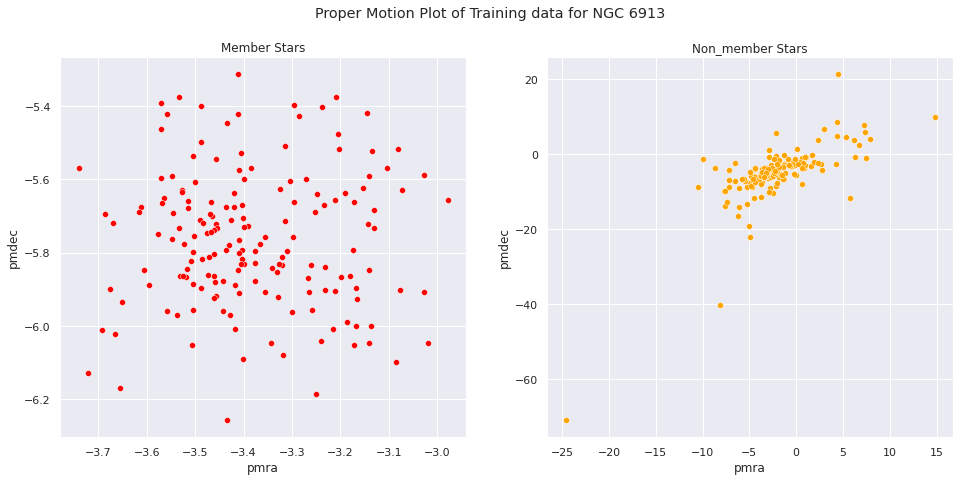

In [323]:
# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(16,7))
fig.suptitle('Proper Motion Plot of Training data for NGC 6913 ')

sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
#plt.show()
sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


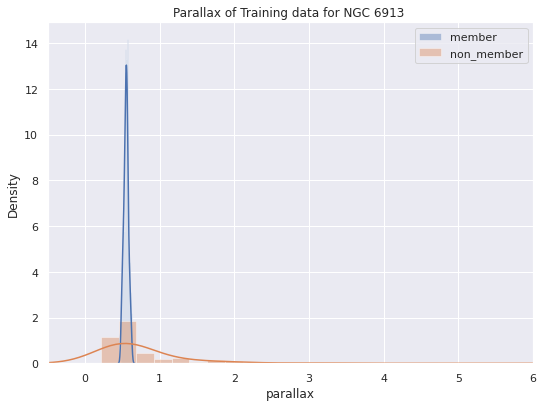

In [324]:
sns.distplot(member.parallax, label='member')
sns.distplot(non_member.parallax, label = 'non_member')
plt.xlim(-0.5,6)
plt.title('Parallax of Training data for NGC 6913 ')
plt.legend()
plt.show()

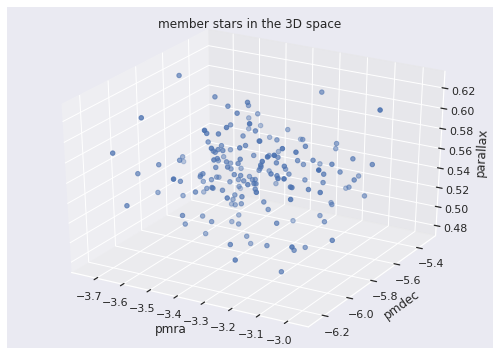

In [325]:
from mpl_toolkits.mplot3d import Axes3D


ax = plt.figure().gca(projection='3d')

ax.scatter(member.pmra, member.pmdec, member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('member stars in the 3D space')
plt.show()


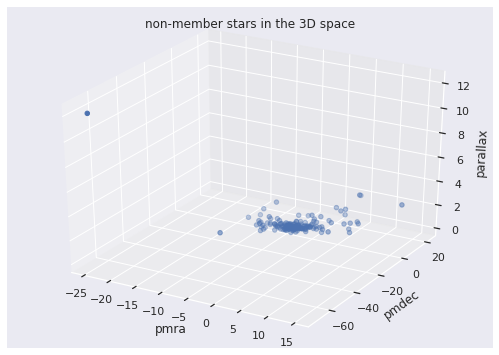

In [326]:
ax = plt.figure().gca(projection='3d')

ax.scatter(non_member.pmra, non_member.pmdec, non_member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('non-member stars in the 3D space')
plt.show()


#### Check Feature Importance using Random Forest

In [327]:
# Use Random Forest on whole dataset using 100 different trees 
rfc = RandomForestClassifier(n_estimators = 100, oob_score = True)
rfc.fit(features, targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [328]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfc.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

pmra        0.387023
pmdec       0.351830
parallax    0.261147
dtype: float64

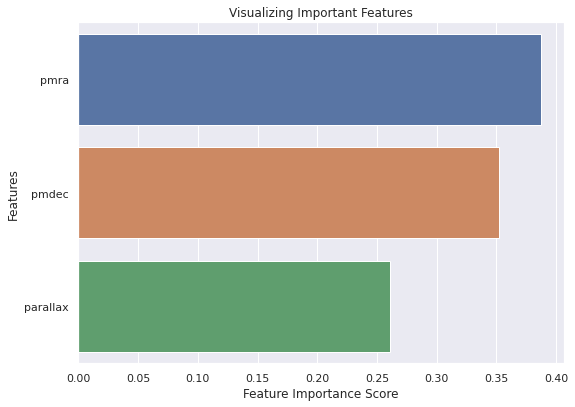

In [329]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Selection and Accuracy Estimate using Test Data

In [330]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report

In [331]:
from sklearn.model_selection import train_test_split
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
train_features, test_features, train_targets, test_targets = train_test_split(features, 
                                                                                targets, 
                                                                                test_size = 0.3, 
                                                                                random_state=258)

In [332]:
def evaluate_model(model):
    test_predict = model.predict(test_features)
    train_predict = model.predict(train_features)

    print('Model Accuracy:')
    print("Precision on training data: %.3f" % precision_score(train_targets, train_predict))
    print("Precision on testing data: %.3f" % precision_score(test_targets, test_predict))
    print('Accuracy on test data: %.3f' % accuracy_score(test_targets, test_predict))


    sns.heatmap(confusion_matrix(test_targets, test_predict), cmap= 'Greens', annot = True)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report: \n", classification_report(test_targets, test_predict))

#### SVC

In [333]:
from sklearn.svm import SVC

# SVC model
svc_clf = SVC(kernel='rbf', gamma = 'scale', random_state=42)

svc_clf.fit(train_features, train_targets)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

Model Accuracy:
Precision on training data: 0.671
Precision on testing data: 0.747
Accuracy on test data: 0.814


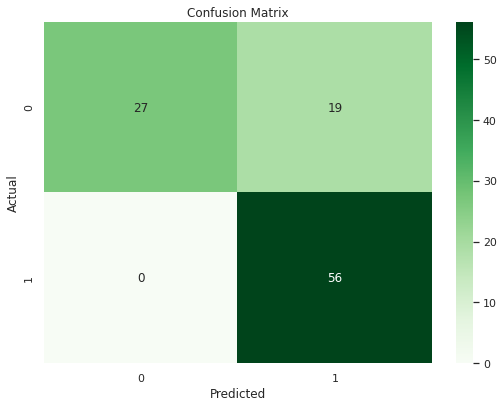

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.59      0.74        46
           1       0.75      1.00      0.85        56

    accuracy                           0.81       102
   macro avg       0.87      0.79      0.80       102
weighted avg       0.86      0.81      0.80       102



In [334]:
evaluate_model(svc_clf)

#### Naive Bayes

Model Accuracy:
Precision on training data: 0.927
Precision on testing data: 0.949
Accuracy on test data: 0.971


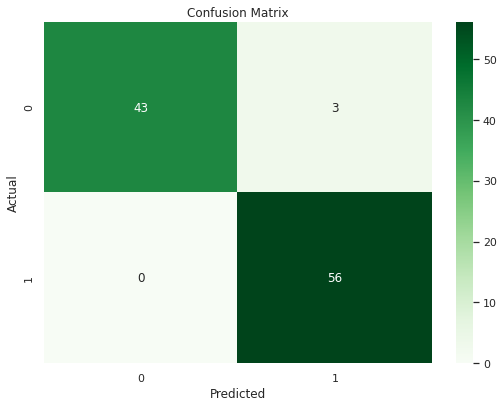

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        46
           1       0.95      1.00      0.97        56

    accuracy                           0.97       102
   macro avg       0.97      0.97      0.97       102
weighted avg       0.97      0.97      0.97       102



In [335]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_features, train_targets)
evaluate_model(gnb)

#### KNN

In [336]:
from sklearn import neighbors
from sklearn.model_selection import cross_val_score, GridSearchCV

knn_cv = neighbors.KNeighborsClassifier()
parameter_grid = {'n_neighbors': [1,2,3,4,5,6,7,8]}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn_cv, parameter_grid, cv=5, scoring='precision')

#fit model to data
knn_gscv.fit(train_features, train_targets)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

In [337]:
# top performance
print("Top Performance: ", knn_gscv.best_params_)
# score for top_performance
print("Top CV score: ", knn_gscv.best_score_)

Top Performance:  {'n_neighbors': 2}
Top CV score:  0.9059523809523811


In [338]:
n_neighbors = 2
knn = neighbors.KNeighborsClassifier(n_neighbors,)
knn.fit(train_features, train_targets)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

Model Accuracy:
Precision on training data: 1.000
Precision on testing data: 0.915
Accuracy on test data: 0.931


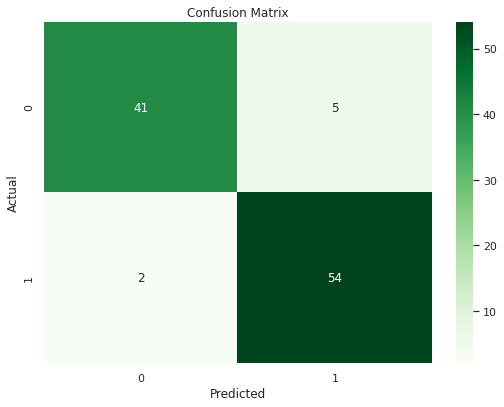

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        46
           1       0.92      0.96      0.94        56

    accuracy                           0.93       102
   macro avg       0.93      0.93      0.93       102
weighted avg       0.93      0.93      0.93       102



In [339]:
evaluate_model(knn)

#### Decision Tree

In [340]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(train_features, train_targets)
test_predict = dtc.predict(test_features)

In [341]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [342]:
from sklearn.model_selection import RandomizedSearchCV

max_features = ['auto', 'sqrt']
# Maximum number of levels
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
np.random.seed(25)
random_states = np.random.choice(range(1,50), size = 10, replace=False)
ccp_alpha = [2**i for i in range(-10,0)]

random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state' : random_states,
               'ccp_alpha': ccp_alpha}

random_grid

{'ccp_alpha': [0.0009765625,
  0.001953125,
  0.00390625,
  0.0078125,
  0.015625,
  0.03125,
  0.0625,
  0.125,
  0.25,
  0.5],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'random_state': array([44, 15, 41, 34, 48,  8, 33, 20, 39, 36])}

In [343]:
# base model
dtc = tree.DecisionTreeClassifier()

dtc_random = RandomizedSearchCV(estimator = dtc, param_distributions = random_grid, 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1,
                               scoring = 'precision')

In [344]:
dtc_random.fit(train_features, train_targets)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 324 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [345]:
 dtc_random.best_params_


{'ccp_alpha': 0.0009765625,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 15}

In [346]:
 dtc_random.best_score_

0.9550000000000001

Model Accuracy:
Precision on training data: 1.000
Precision on testing data: 0.948
Accuracy on test data: 0.961


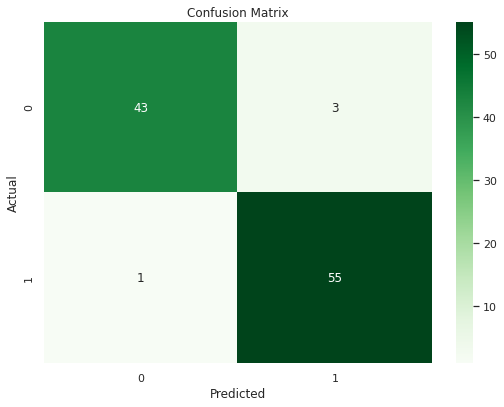

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.93      0.96        46
           1       0.95      0.98      0.96        56

    accuracy                           0.96       102
   macro avg       0.96      0.96      0.96       102
weighted avg       0.96      0.96      0.96       102



In [347]:
base_model_dtc = tree.DecisionTreeClassifier()
base_model_dtc.fit(train_features, train_targets)

evaluate_model(base_model_dtc)


Model Accuracy:
Precision on training data: 0.982
Precision on testing data: 0.947
Accuracy on test data: 0.951


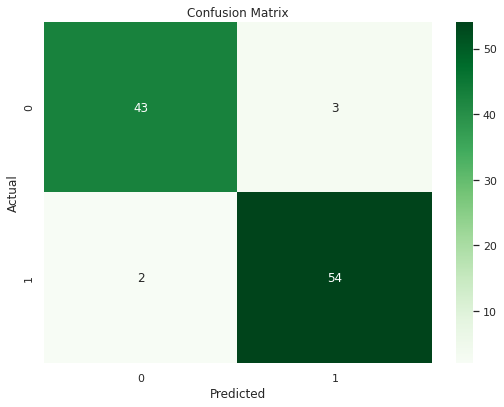

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.93      0.95        46
           1       0.95      0.96      0.96        56

    accuracy                           0.95       102
   macro avg       0.95      0.95      0.95       102
weighted avg       0.95      0.95      0.95       102



In [348]:
best_random_dtc = dtc_random.best_estimator_

evaluate_model(best_random_dtc)


#### Random Forest

In [349]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
# Maximum number of levels
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
ccp_alpha = [2**i for i in range(-10,0)]+[0]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'ccp_alpha': ccp_alpha}

random_grid

{'bootstrap': [True, False],
 'ccp_alpha': [0.0009765625,
  0.001953125,
  0.00390625,
  0.0078125,
  0.015625,
  0.03125,
  0.0625,
  0.125,
  0.25,
  0.5,
  0],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [350]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42,
                                    oob_score = True)

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1,
                               scoring = 'precision')

In [351]:
rfc_random.fit(train_features, train_targets)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [352]:
rfc_random.best_params_


{'bootstrap': True,
 'ccp_alpha': 0.00390625,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 600}



```
{'bootstrap': True,
 'ccp_alpha': 0,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}
 ```



Model Accuracy:
Precision on training data: 1.000
Precision on testing data: 0.949
Accuracy on test data: 0.971


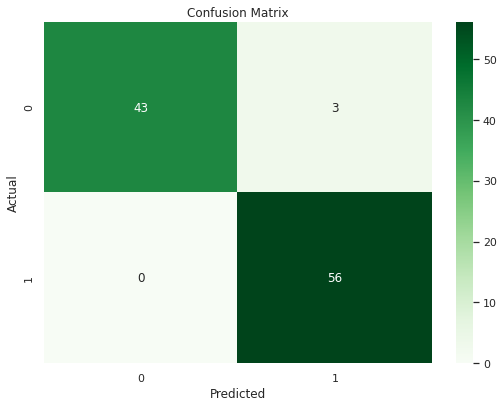

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        46
           1       0.95      1.00      0.97        56

    accuracy                           0.97       102
   macro avg       0.97      0.97      0.97       102
weighted avg       0.97      0.97      0.97       102



In [353]:
base_model = RandomForestClassifier(n_estimators = 100, random_state = 42,
                                    oob_score = True)
base_model.fit(train_features, train_targets)

evaluate_model(base_model)


In [354]:
rfc_random.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.00390625, class_weight=None,
                       criterion='gini', max_depth=110, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

Model Accuracy:
Precision on training data: 0.966
Precision on testing data: 0.949
Accuracy on test data: 0.971


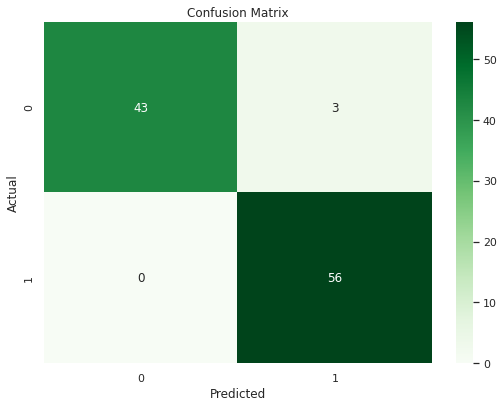

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        46
           1       0.95      1.00      0.97        56

    accuracy                           0.97       102
   macro avg       0.97      0.97      0.97       102
weighted avg       0.97      0.97      0.97       102



In [355]:
best_random = rfc_random.best_estimator_

evaluate_model(best_random)


### Prediction for the new stars

In [356]:
# descriptive stats
all_stars_filtered.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_6913_center
count,2.398800e+04,2.398800e+04,2.398800e+04,23988.0,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.0,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,23988.000000,...,2.375800e+04,23758.000000,23758.000000,23758.000000,23758.000000,23988.000000,23758.000000,23759.000000,23758.000000,1255.000000,1255.000000,23988.000000,1255.000000,1255.000000,1255.000000,23988.000000,23988.000000,23988.000000,23988.000000,12654.000000,12654.000000,12654.000000,12654.000000,7102.000000,7102.000000,7102.000000,7102.000000,7102.000000,7102.000000,10123.0,10123.000000,10123.000000,10123.000000,10123.000000,10123.000000,10123.000000,23988.000000,23988.000000,23988.000000,23988.000000
mean,1.635721e+18,2.061131e+18,8.446716e+08,2015.5,305.869190,0.057078,38.539243,0.070900,0.781683,0.078068,15.801274,-1.816952,0.127964,-4.731426,0.142101,-0.036875,0.026179,-0.143242,-0.058875,0.179411,-0.093279,-0.292032,-0.135669,-0.010502,-0.028642,252.950559,9.167709,251.644614,1.305945,2.732061,355.873322,0.161672,3.416841,31.0,17.064100,1.397108,0.017574,0.043462,28.860180,15.834792,...,3.621315e+04,122.447992,385.088867,15.549088,1.400854,0.107179,2.036028,1.026560,1.009434,-16.596781,3.214843,0.386276,5216.732910,3.415538,-0.120717,76.878376,0.687569,323.941117,55.462711,100044.643749,4283.971191,4085.778320,4632.475586,1.845879,1.620337,2.112963,0.927564,0.809835,1.066376,200111.0,3.064274,2.621062,3.369542,7.581955,6.731927,8.431949,0.546992,44.900356,62.613022,0.546936
std,0.000000e+00,2.146478e+15,4.884126e+08,0.0,0.526275,0.030609,0.394135,0.037889,0.666362,0.041541,22.200291,5.694062,0.069088,6.300589,0.075555,0.091774,0.134952,0.097384,0.070206,0.127295,0.074192,0.138828,0.092861,0.109534,0.095022,23.837011,46.672360,23.796387,1.840581,6.856164,483.160309,0.203936,15.438595,0.0,53.137894,0.085738,0.009509,0.048345,2.642709,1.050647,...,5.317462e+05,6609.067744,338.989288,1.491822,0.119335,0.334595,0.597725,0.412849,0.202583,23.957048,3.637185,1.764786,691.744324,0.547247,0.408210,0.380341,0.424450,0.693556,0.412407,291.755309,654.636414,670.735657,632.905701,0.972481,0.964608,0.980292,0.492585,0.486252,0.500655,0.0,4.268424,3.705122,4.669598,61.403114,55.525539,67.317665,0.183862,85.998054,95.156783,0.183831
min,1.635721e+18,2.057998e+18,3.098050e+05,2015.5,304.961939,0.009945,37.723448,0.011774,0.134849,0.013523,3.0

In [357]:
# chosing only GAIA stars close to 0.40 degree radius of the center
all_stars_filtered = all_stars_filtered.dropna(subset = feature_columns)
GAIA_target_stars = all_stars_filtered[all_stars_filtered['dist_6913_center'] <= (cantat_radius*2)]

In [358]:
# removing the member stars from GAIA data
GAIA_target_stars = pd.concat([GAIA_target_stars, training_data.drop(columns=['PMemb', 'member']), 
                               training_data.drop(columns=['PMemb', 'member'])]).drop_duplicates(keep=False)

In [359]:
# select the set of predictor variables from the new dataset
new_features = GAIA_target_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [360]:
# train the model again using all the features and targets of the previous dataset
# rfc.fit(features, targets)

In [361]:
# estimate the membership classification of the stars
GAIA_target_stars['member'] = best_random.predict(new_features)
GAIA_target_stars['member'].value_counts()

0    12323
1      536
Name: member, dtype: int64

In [362]:
# estimate the membership probability of the stars
GAIA_target_stars['PMemb'] = best_random.predict_proba(new_features)[:,1]
sum(GAIA_target_stars['PMemb'] > 0.5)

536

In [363]:
potentialMember = GAIA_target_stars[GAIA_target_stars['member'] == 1]
len(potentialMember)

536

In [364]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_6913_center,member,PMemb
count,5.360000e+02,5.360000e+02,5.360000e+02,536.0,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.0,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,...,533.000000,533.000000,533.000000,536.000000,533.000000,533.000000,533.000000,3.000000,3.000000,536.000000,3.000000,3.000000,3.0,536.000000,536.000000,536.000000,536.000000,389.000000,389.000000,389.000000,389.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,382.0,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,536.000000,536.000000,536.000000,536.000000,536.0,536.000000
mean,1.635721e+18,2.061068e+18,8.273807e+08,2015.5,305.707900,0.041791,38.561105,0.050518,0.560442,0.056473,15.315890,-3.338157,0.092744,-5.855336,0.102805,-0.031653,0.036046,-0.154366,-0.053287,0.179867,-0.082249,-0.272348,-0.128392,-0.008134,-0.024613,256.223881,20.847015,254.869403,1.354478,0.606293,271.546082,0.088762,0.831115,31.0,41.494335,1.434324,0.012761,0.044668,29.229478,16.035448,...,546.859985,14.787930,1.357319,0.143657,1.788828,0.869572,0.919255,22.398147,2.813662,0.048507,5333.333496,4.000000,0.0,76.823355,0.803246,323.754156,55.534960,100016.596401,4453.676270,4277.701660,4776.665039,2.290561,1.995476,2.711967,1.152358,0.996568,1.371180,200111.0,4.148131,3.683402,4.457769,22.372040,20.278950,24.465139,0.440897,56.521447,91.867238,0.440822,1.0,0.845969
std,0.000000e+00,1.264170e+15,5.009180e+08,0.0,0.330982,0.029701,0.303321,0.035994,0.042810,0.039910,9.095406,0.199072,0.066289,0.256057,0.074080,0.083416,0.137178,0.093125,0.064098,0.123821,0.068134,0.133038,0.096917,0.094996,0.087402,24.646932,69.261167,24.493557,1.787103,3.614285,99.277061,0.149111,2.462314,0.0,83.408043,0.089832,0.009129,0.044954,2.725708,0.965117,...,400.553925,1.741451,0.102297,0.366694,0.554143,0.350285,0.211896,54.009781,2.129549,0.681859,288.675140,0.866025,0.0,0.285543,0.278323,0.465273,0.299401,175.168870,603.375000,612.368347,570.361328,0.584882,0.617743,0.464163,0.299898,0.313738,0.233727,0.0,5.072773,4.822492,5.321254,124.969330,112.834198,137.121582,0.110317,34.498981,57.425522,0.110268,0.0,0.157074
min,1.635721e+18,2.058091e+18,2.601496e+06,2015.5,305.227174,0.010781,37.922678,0.011774,0.465505,0.014355,3.188325,-3.827040,0.022819,-6.780461,0.021726,-0.289349,-0.338699,-0.479553,-0.253253,-0.262658,-0.289604,-0.695057,-0.369477,-0.325717,-0.294540,151.000000,0.000000,147.000000,0.000000,-8.593496,95.898674,0.000000,0.000000,3

In [365]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_6913_center,member
count,1.700000e+02,1.700000e+02,1.700000e+02,170.0,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.0,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,169.000000,169.000000,169.000000,170.000000,169.000000,169.000000,169.000000,1.000000,1.000000,170.000000,1.0,1.0,1.0,170.000000,170.000000,170.000000,170.000000,145.000000,145.000000,145.000000,145.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,144.0,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.0
mean,1.635721e+18,2.061104e+18,8.991247e+08,2015.5,305.916874,0.030140,38.498505,0.036322,0.549987,0.041139,18.595560,-3.380745,0.067076,-5.764726,0.074174,-0.052862,0.047154,-0.138174,-0.051963,0.178949,-0.087508,-0.279096,-0.162469,-0.028793,-0.032876,261.029412,31.388235,259.623529,1.405882,-0.452034,251.052277,0.048083,0.398448,31.0,57.397316,1.461027,0.009230,0.062775,29.729412,16.105882,...,690.067383,14.236567,1.320751,0.176471,1.606532,0.757240,0.849291,-17.989237,5.377616,0.035294,5000.0,3.0,0.0,76.865400,0.633193,323.971153,55.411141,100001.193103,4521.335938,4340.726562,4858.288574,2.151746,1.871649,2.629261,1.076579,0.928603,1.343582,200111.0,4.154220,3.680255,4.482897,15.790257,14.470527,17.109993,0.155453,71.419562,110.971035,0.561765,0.155465,1.0
std,0.000000e+00,3.270528e+14,4.883002e+08,0.0,0.142852,0.021423,0.125399,0.026414,0.031147,0.028844,8.643813,0.162431,0.048570,0.184031,0.055731,0.074475,0.128318,0.103372,0.062765,0.135922,0.061610,0.135682,0.085144,0.094080,0.076245,22.651574,86.893881,22.167718,2.222790,3.340387,79.192787,0.099826,1.263057,0.0,97.824677,0.079588,0.006703,0.040093,2.543762,0.979355,...,393.197235,1.571638,0.072689,0.397521,0.452540,0.271826,0.183238,NaN,NaN,0.460179,NaN,NaN,NaN,0.113765,0.123647,0.190410,0.128638,0.396102,556.623779,550.933777,521.955872,0.770660,0.725869,0.540000,0.391130,0.365506,0.281625,0.0,3.504805,3.357561,3.662597,61.949299,57.375221,66.523674,0.085152,33.970233,51.393213,0.257680,0.085170,0.0
min,1.635721e+18,2.058110e+18,1.723005e+06,2015.5,305.636921,0.011508,38.261299,0.013074,0.479977,0.015596,3.813220,-3.740193,0.025444,-6.255921,0.027417,-0.256366,-0.394684,-0.369383,-0.213974,-0.214332,-0.228630,-0.749702,-0.336544,-0.197922,-0.274328,197.000000,0.000000,196.000000,0.000000,-8.638947,106.939201,0.000000,0.000000,31.0,0.857305,1.293266,0.003151,-0.037380,22.000000

#### Visualization

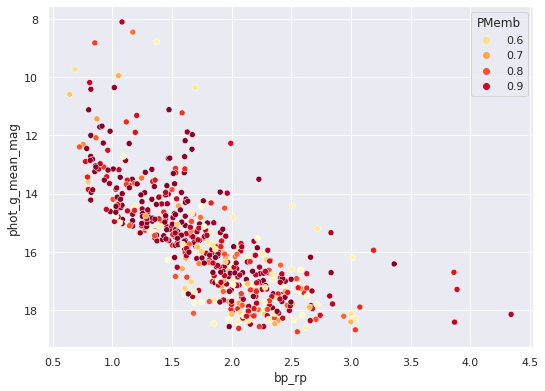

In [366]:
# CMD of predicted members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
cmd.invert_yaxis()

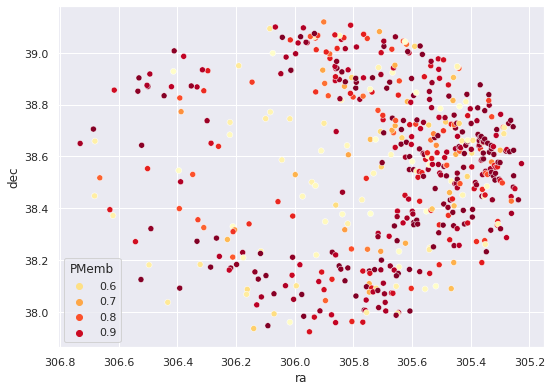

In [367]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

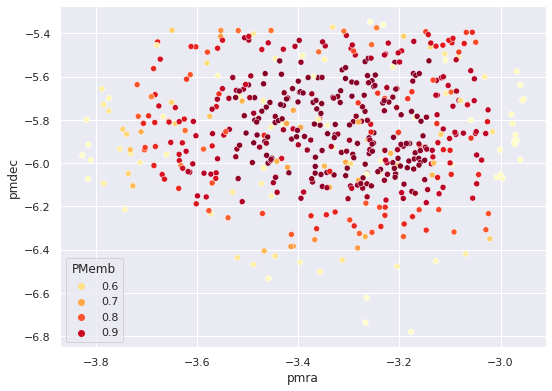

In [368]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )


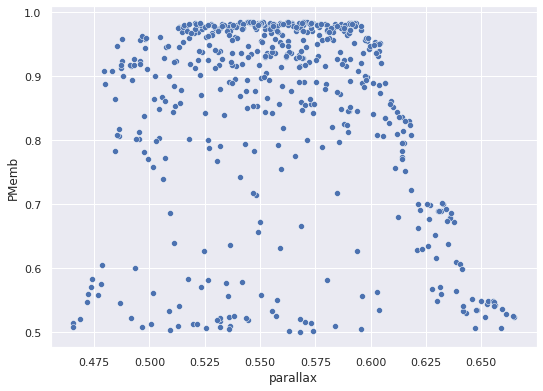

In [369]:
# parallax plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )

In [370]:
# saving the files as csv
# all_stars.to_csv('gaia_6913_membership_prob.csv')

potentialMember.to_csv('NGC_6913_membership_prob.csv')


### Comparing the old and new predicted members

In [371]:
# creating subset for the potential member in previous dataset

concatenated = pd.concat([potentialMember.assign(dataset='New_member'), member.assign(dataset='Old_member')])


In [372]:
concatenated.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_6913_center,member,PMemb
count,7.060000e+02,7.060000e+02,7.060000e+02,706.0,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.0,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,...,702.000000,702.000000,702.000000,706.000000,702.000000,702.000000,702.000000,4.000000,4.000000,706.000000,4.00000,4.000000,4.0,706.000000,706.000000,706.000000,706.000000,534.000000,534.000000,534.000000,534.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,526.0,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,706.000000,706.000000,706.000000,706.000000,706.0,706.000000
mean,1.635721e+18,2.061076e+18,8.446561e+08,2015.5,305.758220,0.038985,38.546031,0.047099,0.557925,0.052781,16.105618,-3.348412,0.086564,-5.833517,0.095911,-0.036760,0.038721,-0.150467,-0.052968,0.179646,-0.083515,-0.273973,-0.136598,-0.013108,-0.026603,257.381020,23.385269,256.014164,1.366856,0.351455,266.611267,0.078967,0.726931,31.0,45.323654,1.440754,0.011911,0.049028,29.349858,16.052408,...,581.335632,14.655191,1.348516,0.151558,1.744943,0.842530,0.902412,12.301301,3.454650,0.045326,5250.00000,3.750000,0.0,76.833479,0.762298,323.806407,55.505145,100012.413858,4472.048340,4294.813477,4798.830078,2.258715,1.967069,2.692993,1.134974,0.980976,1.364848,200111.0,4.149797,3.682540,4.464647,20.570192,18.688816,22.451559,0.372164,60.108811,96.467302,0.372110,1.0,0.777535
std,0.000000e+00,1.112942e+15,4.985109e+08,0.0,0.309870,0.028360,0.272590,0.034458,0.040538,0.038095,9.091641,0.191651,0.063409,0.243674,0.071128,0.081806,0.135092,0.095868,0.063737,0.126742,0.066617,0.133614,0.095281,0.095121,0.084871,24.253113,73.964120,24.025101,1.899602,3.576723,95.181877,0.139873,2.240019,0.0,87.290642,0.088164,0.008735,0.044485,2.689772,0.968336,...,403.198456,1.717304,0.097226,0.374324,0.536849,0.336358,0.207408,48.502469,2.160275,0.635308,288.67514,0.866025,0.0,0.255539,0.260276,0.426134,0.273494,149.611928,591.298523,596.464844,558.334290,0.632545,0.644004,0.482195,0.323424,0.326461,0.244930,0.0,4.692620,4.466333,4.919670,111.299957,100.711761,121.906883,0.160903,34.934888,56.590363,0.160851,0.0,0.222322
min,1.635721e+18,2.058091e+18,1.723005e+06,2015.5,305.227174,0.010781,37.922678,0.011774,0.465505,0.014355,3.188325,-3.827040,0.022819,-6.780461,0.021726,-0.289349,-0.394684,-0.479553,-0.253253,-0.262658,-0.289604,-0.749702,-0.369477,-0.325717,-0.294540,151.000000,0.000000,147.000000,0.000000,-8.638947,95.898674,0.000000,0.000000,31.0

In [373]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_6913_center,member
count,1.700000e+02,1.700000e+02,1.700000e+02,170.0,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.0,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,169.000000,169.000000,169.000000,170.000000,169.000000,169.000000,169.000000,1.000000,1.000000,170.000000,1.0,1.0,1.0,170.000000,170.000000,170.000000,170.000000,145.000000,145.000000,145.000000,145.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,144.0,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.0
mean,1.635721e+18,2.061104e+18,8.991247e+08,2015.5,305.916874,0.030140,38.498505,0.036322,0.549987,0.041139,18.595560,-3.380745,0.067076,-5.764726,0.074174,-0.052862,0.047154,-0.138174,-0.051963,0.178949,-0.087508,-0.279096,-0.162469,-0.028793,-0.032876,261.029412,31.388235,259.623529,1.405882,-0.452034,251.052277,0.048083,0.398448,31.0,57.397316,1.461027,0.009230,0.062775,29.729412,16.105882,...,690.067383,14.236567,1.320751,0.176471,1.606532,0.757240,0.849291,-17.989237,5.377616,0.035294,5000.0,3.0,0.0,76.865400,0.633193,323.971153,55.411141,100001.193103,4521.335938,4340.726562,4858.288574,2.151746,1.871649,2.629261,1.076579,0.928603,1.343582,200111.0,4.154220,3.680255,4.482897,15.790257,14.470527,17.109993,0.155453,71.419562,110.971035,0.561765,0.155465,1.0
std,0.000000e+00,3.270528e+14,4.883002e+08,0.0,0.142852,0.021423,0.125399,0.026414,0.031147,0.028844,8.643813,0.162431,0.048570,0.184031,0.055731,0.074475,0.128318,0.103372,0.062765,0.135922,0.061610,0.135682,0.085144,0.094080,0.076245,22.651574,86.893881,22.167718,2.222790,3.340387,79.192787,0.099826,1.263057,0.0,97.824677,0.079588,0.006703,0.040093,2.543762,0.979355,...,393.197235,1.571638,0.072689,0.397521,0.452540,0.271826,0.183238,NaN,NaN,0.460179,NaN,NaN,NaN,0.113765,0.123647,0.190410,0.128638,0.396102,556.623779,550.933777,521.955872,0.770660,0.725869,0.540000,0.391130,0.365506,0.281625,0.0,3.504805,3.357561,3.662597,61.949299,57.375221,66.523674,0.085152,33.970233,51.393213,0.257680,0.085170,0.0
min,1.635721e+18,2.058110e+18,1.723005e+06,2015.5,305.636921,0.011508,38.261299,0.013074,0.479977,0.015596,3.813220,-3.740193,0.025444,-6.255921,0.027417,-0.256366,-0.394684,-0.369383,-0.213974,-0.214332,-0.228630,-0.749702,-0.336544,-0.197922,-0.274328,197.000000,0.000000,196.000000,0.000000,-8.638947,106.939201,0.000000,0.000000,31.0,0.857305,1.293266,0.003151,-0.037380,22.000000

In [374]:
concatenated.dataset.value_counts()

New_member    536
Old_member    170
Name: dataset, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

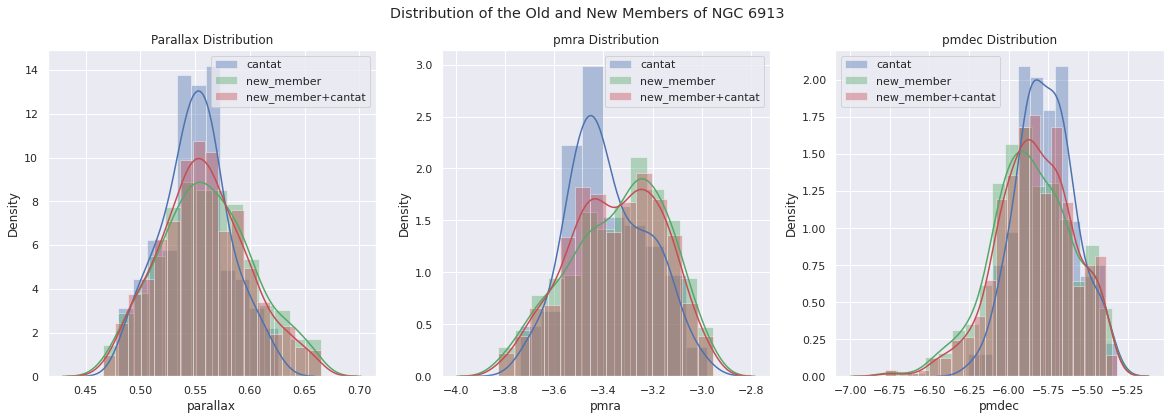

In [375]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Distribution of the Old and New Members of NGC 6913')


sns.distplot(member['parallax'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[0])
sns.distplot(potentialMember['parallax'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[0])
sns.distplot(concatenated['parallax'], color = 'r', ax=axes[0], kde=True,
             label = 'new_member+cantat')
axes[0].set_title('Parallax Distribution')
axes[0].legend()

sns.distplot(member['pmra'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[1])
sns.distplot(potentialMember['pmra'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[1])
sns.distplot(concatenated['pmra'], color = 'r', ax=axes[1], kde=True,
             label = 'new_member+cantat')
axes[1].set_title('pmra Distribution')
axes[1].legend()

sns.distplot(member['pmdec'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[2])
sns.distplot(potentialMember['pmdec'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[2])
sns.distplot(concatenated['pmdec'], color = 'r', ax=axes[2], kde=True,
             label = 'new_member+cantat')
axes[2].set_title('pmdec Distribution')
axes[2].legend()

plt.show()


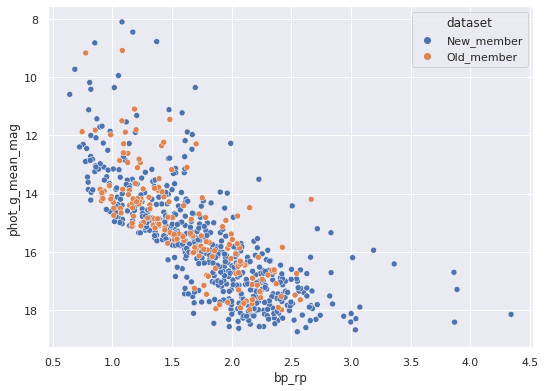

In [376]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

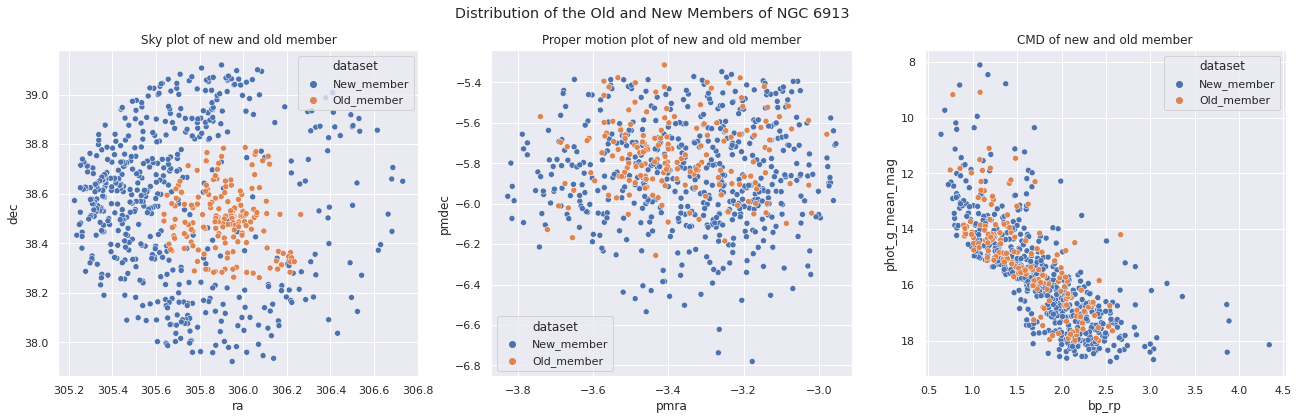

In [377]:
fig, axes = plt.subplots(1, 3, figsize=(22,6))
fig.suptitle('Distribution of the Old and New Members of NGC 6913')

skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                hue='dataset', ax=axes[0])
axes[0].set_title('Sky plot of new and old member')

# proper motion plot
sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                hue='dataset', ax=axes[1])
axes[1].set_title('Proper motion plot of new and old member')

# CMD
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset', ax = axes[2])
cmd.invert_yaxis()
axes[2].set_title('CMD of new and old member')

plt.show()

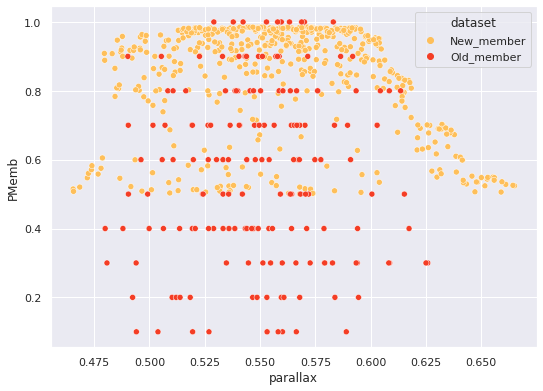

In [378]:
# parallax vs PMemb plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  hue = 'dataset',
                      palette='YlOrRd', data = concatenated )

In [379]:
# pd_prof.ProfileReport(potentialMember)

In [380]:
#files.download('NGC_6913_cantat.csv')

#files.download('NGC_6913_membership_prob.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


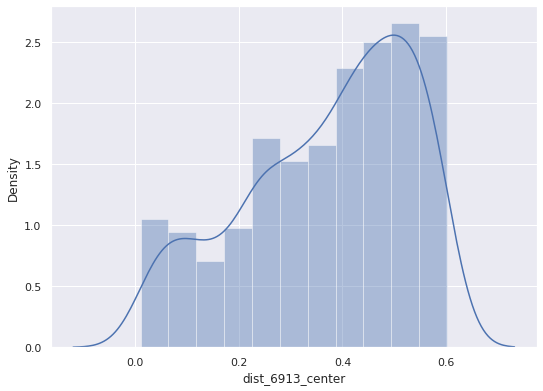

In [381]:
sns.distplot(concatenated['dist_6913_center'])

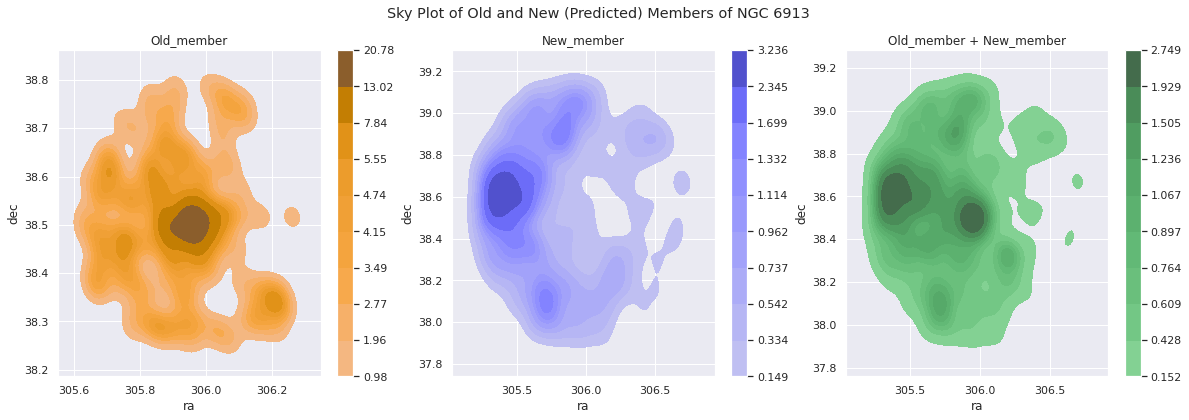

In [382]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Sky Plot of Old and New (Predicted) Members of NGC 6913')

sns.kdeplot(x='ra', y='dec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='ra', y='dec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='ra', y='dec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

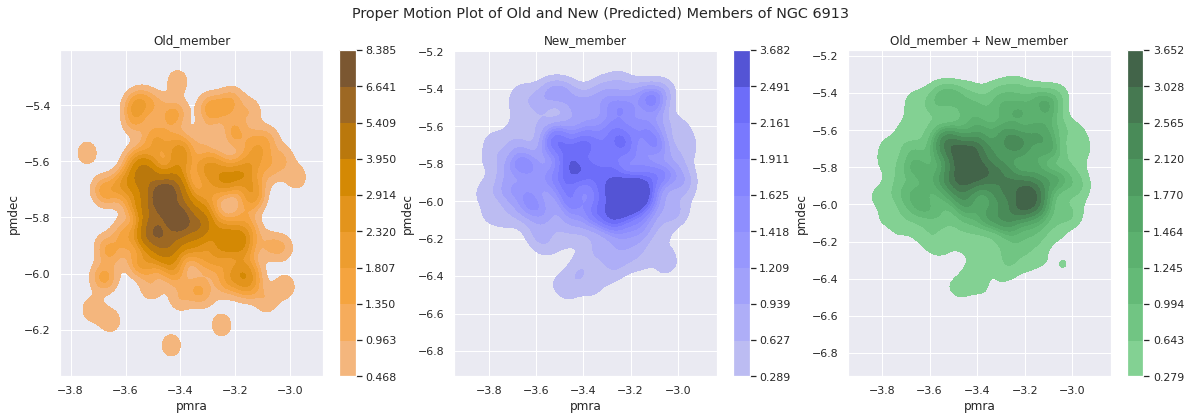

In [389]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Proper Motion Plot of Old and New (Predicted) Members of NGC 6913')

sns.kdeplot(x='pmra', y='pmdec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='pmra', y='pmdec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='pmra', y='pmdec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

In [384]:
#files.download('NGC_6913_cantat.csv')

potentialMember.to_csv('NGC_6913_additional_member_prob.csv')
concatenated.to_csv('NGC_6913_all_member_prob.csv')

files.download('NGC_6913_all_member_prob.csv')
# column 'dataset': Old_member, New_member
# column 'member': 0 and 1
# column 'PMemb': decimal values between 0 to 1

files.download('NGC_6913_additional_member_prob.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>